<a href="https://colab.research.google.com/github/arthurziegler/pytorch-deep-learning-course/blob/main/Notebooks/PyTorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use with our MSE loss

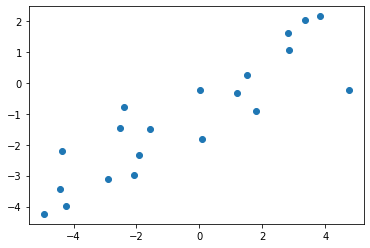

In [4]:
# Plot the data
plt.scatter(X, Y);

In [5]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [6]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
type(inputs)

torch.Tensor

In [9]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 2.1391
Epoch 2/30, Loss: 1.6687
Epoch 3/30, Loss: 1.3616
Epoch 4/30, Loss: 1.1611
Epoch 5/30, Loss: 1.0300
Epoch 6/30, Loss: 0.9444
Epoch 7/30, Loss: 0.8883
Epoch 8/30, Loss: 0.8516
Epoch 9/30, Loss: 0.8276
Epoch 10/30, Loss: 0.8118
Epoch 11/30, Loss: 0.8015
Epoch 12/30, Loss: 0.7947
Epoch 13/30, Loss: 0.7902
Epoch 14/30, Loss: 0.7873
Epoch 15/30, Loss: 0.7854
Epoch 16/30, Loss: 0.7841
Epoch 17/30, Loss: 0.7832
Epoch 18/30, Loss: 0.7827
Epoch 19/30, Loss: 0.7823
Epoch 20/30, Loss: 0.7821
Epoch 21/30, Loss: 0.7819
Epoch 22/30, Loss: 0.7818
Epoch 23/30, Loss: 0.7817
Epoch 24/30, Loss: 0.7817
Epoch 25/30, Loss: 0.7816
Epoch 26/30, Loss: 0.7816
Epoch 27/30, Loss: 0.7816
Epoch 28/30, Loss: 0.7816
Epoch 29/30, Loss: 0.7816
Epoch 30/30, Loss: 0.7816


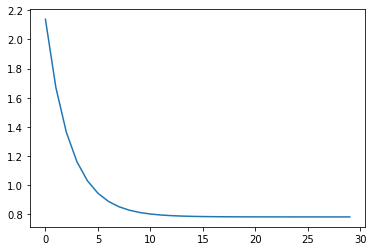

In [10]:
# Plot the loss per iteration
plt.plot(losses);

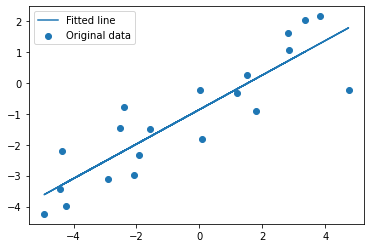

In [15]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Error!
model(inputs).numpy()

RuntimeError: ignored

In [16]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 0.131087  ],
       [-2.0206497 ],
       [-0.01450294],
       [ 1.0087428 ],
       [ 0.715241  ],
       [-3.3011029 ],
       [-2.2019322 ],
       [-2.2702734 ],
       [-0.8603745 ],
       [-1.9424872 ],
       [-3.2300723 ],
       [-2.484468  ],
       [-3.6159832 ],
       [-1.7484181 ],
       [-3.3436406 ],
       [ 0.7135363 ],
       [ 1.7780023 ],
       [ 1.2692208 ],
       [-0.19686353],
       [-0.82058877]], dtype=float32)

In [17]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.55809754]] [-0.8636897]
